In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
# # import sys

# # # from timber.models import timber_attention
# # sys.path.append('home/jina/tree_attention3/timber/')
# # # sys.path.append('timber.models.timber_attention.attention1_block_gpu')

# from timber.models.timber_attention.attention1_block_gpu import timber_attention
# # from timber.models.timber_attention.attention1_block_gpu import timber_attention

# attn_output_timber, (indices, ks, attn_probs, sparsity) = timber_attention(
#     q = t['q'].cuda(),
#     k = t['k'].cuda(),
#     v = t['v'].cuda(),

#     attention_mask = t['attention_mask'],
#     w_start = t['w_start'],
#     n_patches=t['n_patches'],
#     mask_k=t['mask_k'],
#     scale_up = t['scale_up'],
#     is_causal=t['is_causal'],

#     block_size_q=t['block_size_q'],
#     block_size_k=t['block_size_k'],
#     reduce_method=t['reduce_method'],
#     reduce_stride=t['reduce_stride'],
    
#     chunking=t['chunking'],
#     chunk_size=t['chunk_size'],

#     is_flash=t['is_flash'],
#     enable_sparq=t['enable_sparq'],
    
#     sampling_method=t['sampling_method'],

#     ensemble=t['ensemble'],
#     ensemble_model_setting=t['ensemble_model_setting'],
#     ensemble_method=t['ensemble_method'],
#     ensemble_method_final=t['ensemble_method_final'],
#     ensemble_method_final_inter_thresh=t['ensemble_method_final_inter_thresh'],
#     ensemble_method_final_bdd_mask_k=t['ensemble_method_final_bdd_mask_k'],
#     ensemble_per_layer_n=t['ensemble_per_layer_n'],
#     ensemble_per_attn_iter_n=t['ensemble_per_attn_iter_n'],
#     ensemble_model_n=t['ensemble_model_n'],
#     ensemble_particular_layer=t['ensemble_particular_layer'],
#     ensemble_layer_till=t['ensemble_layer_till'],
#     ensemble_randomness=t['ensemble_randomness'],

#     layer_id=t['layer_id'],    
#     using_sliding_window=t['using_sliding_window'],
#     sliding_window_size=t['sliding_window_size'],
    
#     dense_queries_exp=t['dense_queries_exp'],
    
#     rope_method=t['rope_method'],
#     rope_cos=t['rope_cos'],
#     rope_sin=t['rope_sin'],
#     position_ids=t['position_ids'],
    
#     self_extend_scale=t['self_extend_scale'],
#     self_extend_window=t['self_extend_window'],
    
#     using_precomputed_mask=t['using_precomputed_mask'],
#     precomputed_indices=t['precomputed_indices'],
#     precomputed_ks=t['precomputed_ks'],
# )

In [3]:
import torch

t = torch.load(f'cache/stride_debug/random_pruning_s16384.pth', map_location=torch.device('cpu')) # map_location=torch.device('cpu')

t

{'q_timber': tensor([[[ 0.0116, -0.0664,  0.1182,  ..., -0.0469,  0.0184, -0.0703],
          [ 0.0510, -0.0469,  0.0659,  ..., -0.0669,  0.0361, -0.0762],
          [ 0.0645, -0.0515,  0.0669,  ..., -0.0669,  0.0361, -0.0762],
          ...,
          [-0.1152, -0.1689, -0.1611,  ..., -0.0603,  0.0144, -0.0781],
          [-0.0698, -0.2012, -0.2207,  ..., -0.1182,  0.0593, -0.1270],
          [-0.0217, -0.1709, -0.1973,  ..., -0.1084,  0.0586, -0.1187]],
 
         [[ 0.0508,  0.0111, -0.1309,  ..., -0.0464,  0.0278, -0.0449],
          [ 0.2129,  0.1504, -0.0713,  ..., -0.0214,  0.0146, -0.0201],
          [ 0.1904,  0.1328, -0.0771,  ..., -0.0214,  0.0146, -0.0201],
          ...,
          [ 0.0111, -0.0216,  0.0201,  ..., -0.0164, -0.0381, -0.0065],
          [-0.0007,  0.0008,  0.0356,  ...,  0.0148, -0.0410,  0.0157],
          [-0.0042,  0.0143,  0.0469,  ...,  0.0136, -0.0342,  0.0139]],
 
         [[-0.0688, -0.0645, -0.0623,  ..., -0.0378, -0.0332, -0.0327],
          [-0.06

In [4]:
hip = []

for i in range(20):
    hip.append(torch.load(f'cache/stride_debug/hip_attention{i}_s16384.pth', map_location=torch.device('cpu')))

In [5]:
hip[0]

{'indices': tensor([[[    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          ...,
          [11550, 11552, 11554,  ..., 16170, 16172, 16174],
          [14052, 14054, 14056,  ..., 16242, 16244, 16246],
          [12544, 12546, 12548,  ..., 16266, 16268, 16270]],
 
         [[    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          ...,
          [12558, 12560, 12562,  ..., 16206, 16208, 16210],
          [10730, 10732, 10734,  ..., 16230, 16232, 16234],
          [12192, 12194, 12196,  ..., 16306, 16308, 16310]],
 
         [[    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          [    0,     2,     4,  ...,   506,   508,   510],
          ...,
          [ 9370,  9372,  9374,  ..., 

In [6]:
N_H, TDST_BQ, MASK_K_BK = hip[0]['indices'].shape
N_H, TDST_BQ = hip[0]['ks'].shape

indices = hip[0]['indices']
ks = hip[0]['ks']

In [7]:
range_tensor = torch.arange(MASK_K_BK,)[None, None, :]
mask = range_tensor >= ks.unsqueeze(-1)
assert 9999999 > ks.max().item()
# indices[mask] = 9999999
indices.masked_fill_(mask, 9999999)


tensor([[[      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         ...,
         [  11550,   11552,   11554,  ...,   16170,   16172,   16174],
         [  14052,   14054,   14056,  ...,   16242,   16244,   16246],
         [  12544,   12546,   12548,  ...,   16266,   16268,   16270]],

        [[      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         ...,
         [  12558,   12560,   12562,  ...,   16206, 9999999, 9999999],
         [  10730,   10732,   10734,  ...,   16230, 9999999, 9999999],
         [  12192,   12194,   12196,  ...,   16306,   16308,   16310]],

        [[      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 99

In [8]:
ks.unsqueeze(-1), ks.unsqueeze(-1).shape

(tensor([[[ 32],
          [ 64],
          [ 96],
          ...,
          [256],
          [256],
          [256]],
 
         [[ 32],
          [ 64],
          [ 96],
          ...,
          [254],
          [254],
          [256]],
 
         [[ 32],
          [ 64],
          [ 96],
          ...,
          [252],
          [256],
          [256]],
 
         ...,
 
         [[ 32],
          [ 64],
          [ 96],
          ...,
          [256],
          [256],
          [256]],
 
         [[ 32],
          [ 64],
          [ 96],
          ...,
          [256],
          [256],
          [256]],
 
         [[ 32],
          [ 64],
          [ 96],
          ...,
          [252],
          [256],
          [256]]]),
 torch.Size([32, 512, 1]))

In [9]:
range_tensor, range_tensor.shape

(tensor([[[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
            14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
            28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
            56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
            70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
            84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
            98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
           112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
           126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
           154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
           168, 169, 170, 17

In [10]:
t['ensemble_attn_mask_per_layer'].shape

torch.Size([32, 512, 256, 20])

In [11]:
import math
from timber.trainer.timber_trainer import load_model
import torch
import os

def ensemble_random_pruning(
    # ks : torch.Tensor,
    q_timber: torch.Tensor,
    k: torch.Tensor,
    v : torch.Tensor,
    mask_k : int,
    block_size_q : int,
    block_size_k : int,

    ensemble : bool,
    ensemble_model_setting : str,
    ensemble_method : str, 
    ensemble_method_final : str,
    ensemble_method_final_inter_thresh : int,
    ensemble_method_final_bdd_mask_k : int,
    ensemble_per_layer_n : int,
    ensemble_per_attn_iter_n : int,
    ensemble_model_n : int,
    ensemble_particular_layer : int,
    ensemble_attn_mask_per_layer : torch.Tensor, 
    ensemble_randomness : float,

    layer_id : int,
    ):

    N_H, TDST, HID = q_timber.shape
    _, TSRC, _ = k.shape
    _N_H, TDST_BQ, MASK_K_BK, MODEL_N = ensemble_attn_mask_per_layer.shape
    assert N_H == _N_H # Not confident abt this
    assert TDST_BQ == TDST//block_size_q
    # indices : [40, 128, 256] = [N*H, TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K]
    assert ensemble_method in ['final_attn']
    assert ensemble_method_final in ['query',]

    origin_sparsity = (torch.sum(ensemble_attn_mask_per_layer < TSRC)//ensemble_model_n).item()
    if ensemble_method == "final_attn":
        '''
        [40, 128, 256] * 5
        package in one batch; 
        in batch; output of attentions
        '''

        if ensemble_method_final_bdd_mask_k == 1:
            ensemble_indices_k_size = mask_k//block_size_k
        else:
            # TODO set to max possible memory : change it more efficiently
            ensemble_indices_k_size = MASK_K_BK * MODEL_N 

        # TODO: Is it better to start plain and concatenate?
        # ensembled_indices = torch.full((_N_H*TDST_BQ, ensemble_indices_k_size), 9999999) # change to (N_H, TDST_BQ, ensemble_indices_k_size)

        # k_size_max = 0

        # NOTE per_query_token_cnt_diclist is just for analysis
        if os.environ.get('ENSEMBLE_AGREE_DICLIST', '0') == '1':
            per_query_token_cnt_diclist = []
        
        if ensemble_method_final == 'intersection' or ensemble_method_final == "query":
            # ensemble_attn_mask_per_layer [40, 128, 256, 5] to [N*H * TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K * ensemble_model_n]
            ensemble_attn_mask_per_layer = ensemble_attn_mask_per_layer.view(_N_H * TDST_BQ, MASK_K_BK * MODEL_N)
            # ensemble_attn_mask_per_layer : [N*H * TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K * ensemble_model_n]
            unique_x, indices, unique_cnt = torch.unique(ensemble_attn_mask_per_layer, return_inverse=True, sorted=False, return_counts=True)
            # indices -= indices.min(dim=1, keepdims=True)[0]
            
            # cnt_x = (unique_x[None, None, :] == ensemble_attn_mask_per_layer[:, :, None]).long().sum(1)
            N, K = ensemble_attn_mask_per_layer.shape

            print('unique_x', unique_x)
            print('ensemble_attn_mask_per_layer', ensemble_attn_mask_per_layer[-1])

            cnt_xs = []
            chunk_n = 64
            for icn in range(int(math.ceil(N / chunk_n))):
                cnt_xs.append(
                    (unique_x[None, None, :] == ensemble_attn_mask_per_layer[icn*chunk_n:icn*chunk_n+chunk_n, :, None]).long().sum(1)
                )
            cnt_x = torch.cat(cnt_xs, dim=0)

            print('cnt_x', cnt_x.shape, cnt_x[-1], (cnt_x != 0).int().sum())
            
            print(ensemble_attn_mask_per_layer.shape, indices.max())
            result = torch.full((N, unique_x.shape[0]), 9999999, device=indices.device, dtype=torch.int64)
            result = result.scatter_(1, indices, ensemble_attn_mask_per_layer)
            
            N, K = result.shape
            ts = []
            chunk_n = 64
            for icn in range(int(math.ceil(N / chunk_n))):
                t = result[icn*chunk_n:icn*chunk_n+chunk_n, :, None] == unique_x[None, None, :]
                t = t * torch.arange(len(unique_x), device=t.device)[None, None, :]
                t = t.sum(-1)
                ts.append(t)
            t = torch.cat(ts, dim=0)

            print('result_cnt', cnt_x.gather(-1, t)[-1])

            result_cnt = torch.where(result < 9999999, cnt_x.gather(-1, t), -9999999)

            print('result_cnt', result_cnt[-1])

            '''
            ensemble_attn_mask_per_layer
            tensor([[1, 1, 3, 3, 3, 5],\
                    [3, 3, 4, 4, 4, 4]])
            ensemble_cnt_sorted
            tensor([[       6,        4,        3,        3,        2,        1,        1,
            -9999999, -9999999, -9999999, -9999999, -9999999, -9999999, -9999999,
            -9999999, -9999999, -9999999, -9999999, -9999999, -9999999],\
            [       6,        4,        3,        3,        2,        2, -9999999,
            -9999999, -9999999, -9999999, -9999999, -9999999, -9999999, -9999999,
            -9999999, -9999999, -9999999, -9999999, -9999999, -9999999]])
            ensemble_sorted
            tensor([[   10,     6,     3,     8,     1,     5,    11, 32000, 32000, 32000,
            32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000],\
            [    5,     4,     7,     9,     6,     3, 32000, 32000, 32000, 32000,
            32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000]]))
            '''
            # ensemble_sorted : [N*H * TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K * ensemble_model_n]
            # ensemble_cnt_sorted : [N*H * TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K * ensemble_model_n]
            ensemble_cnt_sorted, indices = torch.sort(result_cnt, dim=-1, descending=True)
            ensemble_sorted = result.gather(-1, indices)
            if ensemble_method_final_inter_thresh == None and ensemble_method_final_bdd_mask_k == 1:
                ensemble_filtered = ensemble_sorted
                ensemble_cnt_filtered = ensemble_cnt_sorted
            else:
                print('ensemble_cnt_sorted', ensemble_cnt_sorted[-1])
                print('ensemble_method_final_inter_thresh', ensemble_method_final_inter_thresh)

                mask = ensemble_cnt_sorted >= ensemble_method_final_inter_thresh

                print('mask', mask.shape, mask[-1])

                ensemble_filtered = torch.where(mask, ensemble_sorted, torch.tensor(9999999, device=mask.device))
                ensemble_cnt_filtered = torch.where(mask, ensemble_cnt_sorted, torch.tensor(9999999, device=mask.device))
                
            ## mask_i : where to discard leftovers 
            filtered_mask = ensemble_filtered == 9999999
            # Determine which columns have all rows as -1
            columns_with_all_negative_one = torch.all(filtered_mask, dim=0)

            # Get the first index where all rows have -1
            nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

            # If there are any such columns, find the first one
            if len(nonzero_indices[0]) > 0:
                mask_k_i = nonzero_indices[0][0].item()
                k_final = min(mask_k_i, ensemble_indices_k_size)
            else:
                mask_k_i = -1  # If no such index is found
                k_final = ensemble_indices_k_size # CHECK - is it min(ensemble_indices_k_size, ensemble_filtered.shape[1])

            ensemble_filtered = ensemble_filtered[:, :k_final] # TODO is this meaningful??
            ensemble_cnt_filtered = ensemble_cnt_filtered[:, :k_final]
            ensemble_filtered = ensemble_filtered.view(_N_H, TDST_BQ, -1)
        elif ensemble_method_final == "time_dim":
            pass
            # assert ensemble_method_final_timedim != None
        
        elif ensemble_method_final == "head":
            pass
        elif ensemble_method_final == "batch":
            pass

        # breakpoint()
        k_mask = ensemble_filtered < 9999999
        ks = k_mask.sum(dim=-1).view(_N_H, TDST_BQ)
        sparsity_per_layer = torch.sum(ensemble_filtered<9999999).item()
        sparsity_ratio = (sparsity_per_layer/origin_sparsity)

        # NOTE per_query_token_cnt_diclist is just for analysis
        if os.environ.get('ENSEMBLE_AGREE_DICLIST', '0') == '1':
            os.makedirs('./cache/llama/bef_ensb', exist_ok=True)
            torch.save({
                "initial_indices": result,
                "initial_cnt" : result_cnt,
                'sorted_indices' : ensemble_sorted,
                'sorted_cnt' : ensemble_cnt_sorted,
                'randomness' : ensemble_randomness,
                'final_indices' : ensemble_filtered,
                'final_cnt' : ensemble_cnt_filtered
            }, f'./cache/llama/bef_ensb/ensbn{ensemble_model_n}_agreement_0.5.pth')
            input('>>> ')

        
    return ensemble_filtered, ks, origin_sparsity, sparsity_per_layer, sparsity_ratio

[2024-04-27 16:40:20,079] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [12]:
# import llm_ensemble.method.random_pruning as ops
# import importlib
# importlib.reload(ops)

device = 'cuda:4'

indices, ks, origin_sparsity, sparsity_per_layer, sparsity_ratio = ensemble_random_pruning(
    q_timber=t['q_timber'][:1].to(device),
    k=t['k'][:1].to(device),
    v=t['v'][:1].to(device),
    mask_k=t['mask_k'],
    block_size_q=t['block_size_q'],
    block_size_k=t['block_size_k'],

    ensemble=t['ensemble'],
    ensemble_model_setting=t['ensemble_model_setting'],
    ensemble_method=t['ensemble_method'], 
    ensemble_method_final=t['ensemble_method_final'],
    ensemble_method_final_inter_thresh=t['ensemble_method_final_inter_thresh'],
    ensemble_method_final_bdd_mask_k=t['ensemble_method_final_bdd_mask_k'],
    ensemble_per_layer_n=t['ensemble_per_layer_n'],
    ensemble_per_attn_iter_n=t['ensemble_per_attn_iter_n'],
    ensemble_model_n=t['ensemble_model_n'],
    ensemble_particular_layer=t['ensemble_particular_layer'],
    ensemble_attn_mask_per_layer=t['ensemble_attn_mask_per_layer'][:1].to(device), 
    ensemble_randomness=t['ensemble_randomness'],

    layer_id=t['layer_id'],
)

unique_x tensor([      0,       2,       4,  ...,   16268,   16270, 9999999],
       device='cuda:4')
ensemble_attn_mask_per_layer tensor([12544, 12544, 12544,  ..., 16270, 16270, 16270], device='cuda:4')
cnt_x torch.Size([512, 8100]) tensor([ 0,  0,  0,  ..., 20, 20,  0], device='cuda:4') tensor(146102, device='cuda:4')
torch.Size([512, 5120]) tensor(8099, device='cuda:4')
result_cnt tensor([ 0,  0,  0,  ..., 20, 20,  0], device='cuda:4')
result_cnt tensor([-9999999, -9999999, -9999999,  ...,       20,       20, -9999999],
       device='cuda:4')
ensemble_cnt_sorted tensor([      20,       20,       20,  ..., -9999999, -9999999, -9999999],
       device='cuda:4')
ensemble_method_final_inter_thresh 1
mask torch.Size([512, 8100]) tensor([ True,  True,  True,  ..., False, False, False], device='cuda:4')


tensor([[[      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         [      0,       2,       4,  ..., 9999999, 9999999, 9999999],
         ...,
         [  11550,   11552,   11554,  ..., 9999999, 9999999, 9999999],
         [  14052,   14054,   14056,  ..., 9999999, 9999999, 9999999],
         [  12544,   12546,   12548,  ..., 9999999, 9999999, 9999999]]],
       device='cuda:4')


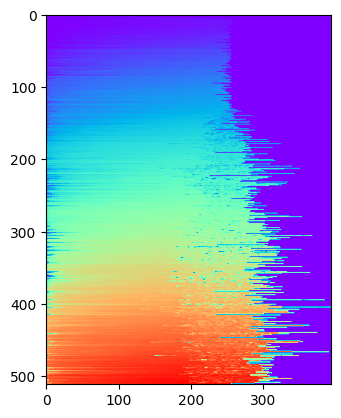

In [18]:
import matplotlib.pyplot as plt

print(indices)

plt.imshow((indices[0] * (indices[0] < 33000)).float().cpu().numpy(), cmap='rainbow')